# Student Exam Pass/Fail Prediction

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## 2. Load Dataset

data = pd.read_csv(r"C:\Users\Lenovo\Downloads\student_exam_performance.csv")

print("Dataset Preview:")
print(data.head())

## 3. Pass/Fail Target & Features

In [4]:
data["Pass"] = (data["Exam_Score"] >= 50).astype(int)

In [5]:
X = data[["Hours_Studied", "Attendance", "Previous_Scores"]]
y = data["Pass"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## 4. Feature Scalaing & Models

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
logistic_model = LogisticRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

models = {
    "Logistic Regression": logistic_model,
    "KNN": knn_model,
    "Random Forest": rf_model
}

## 5. Train, Predict, Evaluate

In [14]:
results = {}

for name, model in models.items():
    if name == "Random Forest":
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [13]:
# Convert results dictionary to DataFrame
results_df = pd.DataFrame({
    model: {
        "Accuracy": results[model]["Accuracy"],
        "F1 Score": results[model]["F1 Score"]
    }
    for model in results
}).T

print("Model Performance Matrix:")
print(results_df)


Model Performance Matrix:
                     Accuracy  F1 Score
Logistic Regression     0.975  0.987342
KNN                     1.000  1.000000
Random Forest           1.000  1.000000


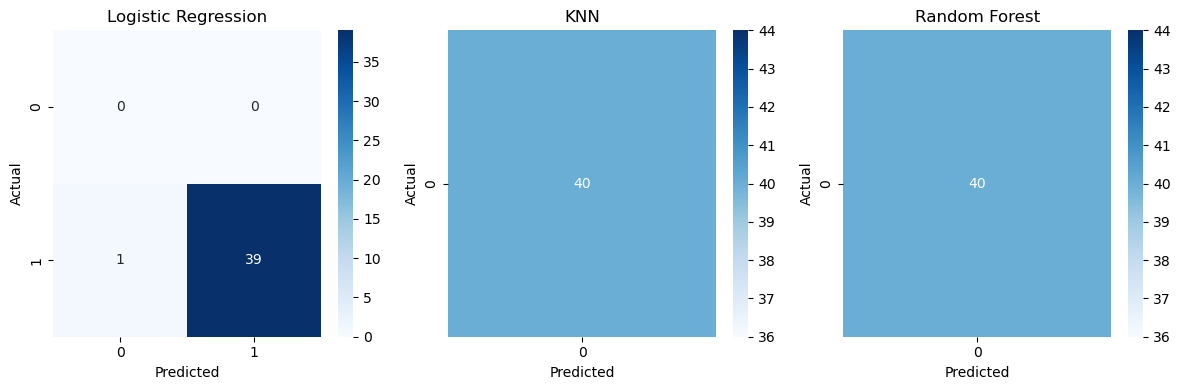

In [11]:
plt.figure(figsize=(12, 4))

for i, (name, res) in enumerate(results.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(res["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()